# Document Classification with Naive Bayes - Lab
https://github.com/learn-co-students/dsc-document-classification-with-naive-bayes-lab-online-ds-pt-100719/tree/solution

## Introduction

In this lesson, you'll practice implementing the Naive Bayes algorithm on your own.

## Objectives

In this lab you will:  

* Implement document classification using Naive Bayes

## Import the dataset

To start, import the dataset stored in the text file `'SMSSpamCollection'`.

In [1]:
# Your code here
from fsds_100719.imports import *

df = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','text'])
df.head()

fsds_1007219  v0.7.17 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Account for class imbalance

To help your algorithm perform more accurately, subset the dataset so that the two classes are of equal size. To do this, keep all of the instances of the minority class (spam) and subset examples of the majority class (ham) to an equal number of examples.

In [2]:
df['label'].value_counts(normalize=False).idxmin()

'spam'

In [3]:
# Your code here
df['label'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: label, dtype: float64

In [4]:
def undersample_df(df, col='label',random_state=42):
    """Undersample dataframe to match minority class count in col"""
    val_counts =  df[col].value_counts()
    minority_count = val_counts.min()

    df2  = pd.DataFrame(columns=df.columns)
    for grp,idx in df.groupby(col).groups.items():

        df_temp = df.loc[idx].sample(n=minority_count,random_state=random_state)
        df2 = pd.concat([df2,df_temp],axis=0)
    
    return df2

In [5]:
df2 = undersample_df(df)
df2.head()

,label,text
3714,ham,If i not meeting ü all rite then i'll go home ...
1311,ham,"I.ll always be there, even if its just in spir..."
548,ham,"Sorry that took so long, omw now"
1324,ham,I thk 50 shd be ok he said plus minus 10.. Did...
3184,ham,Dunno i juz askin cos i got a card got 20% off...


In [6]:
df2['label'].value_counts()

spam    747
ham     747
Name: label, dtype: int64

In [7]:
## STEP NOT MENTIONED IN LAB BUT IN SOLUTION
p_classes=dict(df2['label'].value_counts(normalize=True))
p_classes

{'spam': 0.5, 'ham': 0.5}

## Train-test split

Now implement a train-test split on the dataset: 

In [8]:
# Your code here
from sklearn.model_selection import train_test_split
X = df2['text'].copy()
y = df2['label'].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=17)
train_df = pd.concat([X_train,y_train],axis=1)
test_df = pd.concat([X_test,y_test],axis=1)

## Create the word frequency dictionary for each class

Create a word frequency dictionary for each class: 

In [11]:
## May way
from collections import Counter

class_word_freq = {}
for class_ in  train_df['label'].unique():
    text = train_df[train_df['label']==class_]['text']
    text = ' '.join(text)

    class_word_freq[class_] = Counter(text.split(' '))

    
print(class_word_freq.keys())
class_word_freq['ham']

dict_keys(['spam', 'ham'])


Counter({'Well,': 1,
         "i'm": 12,
         'gonna': 4,
         'finish': 3,
         'my': 60,
         'bath': 2,
         'now.': 9,
         'Have': 12,
         'a': 100,
         'good...fine': 1,
         'night.': 2,
         "I've": 4,
         'reached': 2,
         'home': 11,
         'n': 18,
         'i': 80,
         'bathe': 2,
         'liao...': 1,
         'U': 25,
         'can': 24,
         'call': 24,
         'me': 62,
         'now...': 1,
         'Got': 4,
         'it!': 2,
         'It': 7,
         'looks': 1,
         'scrumptious...': 1,
         'daddy': 2,
         'wants': 6,
         'to': 166,
         'eat': 8,
         'you': 182,
         'all': 22,
         'night': 6,
         'long!': 1,
         'Ok.': 4,
         'Watching': 4,
         'cartoon,': 2,
         'listening': 2,
         'music': 2,
         '&amp;': 16,
         'at': 31,
         'eve': 2,
         'had': 11,
         'go': 24,
         'temple': 2,
         'church..'

In [12]:
## Solution way
class_word_freq = {} 
classes = train_df['label'].unique()
for class_ in classes:
    temp_df = train_df[train_df['label'] == class_]
    bag = {}
    for row in temp_df.index:
        doc = temp_df['text'][row]
        for word in doc.split():
            bag[word] = bag.get(word, 0) + 1
    class_word_freq[class_] = bag
    
    
    
print(class_word_freq.keys())
class_word_freq['ham']

dict_keys(['spam', 'ham'])


{'Well,': 1,
 "i'm": 12,
 'gonna': 4,
 'finish': 3,
 'my': 60,
 'bath': 2,
 'now.': 9,
 'Have': 12,
 'a': 100,
 'good...fine': 1,
 'night.': 2,
 "I've": 4,
 'reached': 2,
 'home': 11,
 'n': 18,
 'i': 80,
 'bathe': 2,
 'liao...': 1,
 'U': 25,
 'can': 24,
 'call': 24,
 'me': 62,
 'now...': 1,
 'Got': 4,
 'it!': 2,
 'It': 7,
 'looks': 1,
 'scrumptious...': 1,
 'daddy': 2,
 'wants': 6,
 'to': 166,
 'eat': 8,
 'you': 182,
 'all': 22,
 'night': 6,
 'long!': 1,
 'Ok.': 4,
 'Watching': 4,
 'cartoon,': 2,
 'listening': 2,
 'music': 2,
 '&amp;': 16,
 'at': 31,
 'eve': 2,
 'had': 11,
 'go': 24,
 'temple': 2,
 'church..': 2,
 'What': 13,
 'about': 18,
 'u?': 4,
 'Oh': 5,
 'k.k..where': 1,
 'did': 4,
 'take': 8,
 'test?': 1,
 'Also': 3,
 'hi': 1,
 'wesley': 1,
 "how've": 1,
 'been': 8,
 'Will': 7,
 'do,': 1,
 'be': 38,
 "blake's": 1,
 'night?': 1,
 'I': 163,
 'might': 2,
 'able': 2,
 'get': 26,
 'out': 17,
 'of': 59,
 'here': 4,
 'little': 3,
 'early': 3,
 'WHO': 1,
 'ARE': 3,
 'YOU': 2,
 'SEEING?'

## Count the total corpus words
Calculate V, the total number of words in the corpus: 

In [ ]:
## Solution way
vocabulary = set()
for text in train_df['text']:
    for word in text.split():
        vocabulary.add(word)
V = len(vocabulary)
V

## Create a bag of words function

Before implementing the entire Naive Bayes algorithm, create a helper function `bag_it()` to create a bag of words representation from a document's text.

In [ ]:
# # May way
# def bag_it(doc):
#     return Counter(doc.split())
# bag_it(X_train.iloc[0])

In [ ]:
## Solution way
def bag_it(doc):
    bag = {}
    for word in doc.split():
        bag[word] = bag.get(word, 0) + 1
    return bag

## Implementing Naive Bayes

Now, implement a master function to build a naive Bayes classifier. Be sure to use the logarithmic probabilities to avoid underflow.

In [ ]:
# Solution way
def classify_doc(doc, class_word_freq, p_classes, V, return_posteriors=False):
    bag = bag_it(doc)
    classes = []
    posteriors = []
    
    for class_ in class_word_freq.keys():
        p = np.log(p_classes[class_])
        
        for word in bag.keys():
            num = bag[word]+1
            denom = class_word_freq[class_].get(word, 0) + V
            p += np.log(num/denom)
        classes.append(class_)
        posteriors.append(p)
    if return_posteriors:
        print(posteriors)
    return classes[np.argmax(posteriors)]

## Test your classifier

Finally, test your classifier and measure its accuracy. Don't be perturbed if your results are sub-par; industry use cases would require substantial additional preprocessing before implementing the algorithm in practice.

In [ ]:
class_word_freq

In [ ]:
y_hat_train = X_train.map(lambda x: classify_doc(x, class_word_freq, p_classes, V))
residuals = y_train == y_hat_train
residuals.value_counts(normalize=True)

In [ ]:
y_hat_test= X_test.map(lambda x: classify_doc(x, class_word_freq, p_classes, V))
residuals = y_test== y_hat_test
residuals.value_counts(normalize=True)

# Level up (Optional)

Rework your code into an appropriate class structure so that you could easily implement the algorithm on any given dataset.

## My Way - OOP & sklearn

In [14]:
# d1 = class_word_freq['spam']
# d2 = class_word_freq['ham']

# d3 = {}
# for k,v in d1.items():
#     d3[k] = v
#     if k in d2:
#         d3[k]+=d2[k]
        
# for k,v in d2.items():
#     if k not in d1:
#         d3[k]=v
# d3

In [ ]:
# d1 = class_word_freq['spam']
# d2 = class_word_freq['ham']
# def join_2freq_dicts(d1,d2):
#     d3 = {}
#     for k,v in d1.items():
#         d3[k] = v
#         if k in d2:
#             d3[k]+=d2[k]

#     for k,v in d2.items():
#         if k not in d1:
#             d3[k]=v
            
#     return d3
# d_ = join_2freq_dicts(d1,d2)
# d_['in']

In [15]:
## Combine class dicts
def join_freq_dicts(*ds):
    """Combines any number of frequency word dicts"""
    D = {}
    for d in ds:
        for k,v in d.items():
            cur_v = D.get(k,0)
            D[k] = cur_v+v
    return D

### Making your own sklearn estimator

- http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/

- https://scikit-learn.org/stable/developers/develop.html

In [92]:
from sklearn.utils.estimator_checks import check_estimator
from sklearn.base import BaseEstimator,ClassifierMixin

class Bayes(ClassifierMixin,BaseEstimator):

    def __init__(self,*args,**kwargs):
        self._id = 'Bayesian Classification built on top of sklearn.'
        
    def fit(self, X_train,y_train,class_priors=None):
        """After fitting, model will have .classes_, 
        .class_word_freq, .class_priors"""
        
        class_word_freq = {} 
        classes = list(y_train.unique())
        self.classes_ = classes
        
        vocab ={}
        for class_ in classes:
            temp_df = X_train[y_train == class_]
            bag = {}
            for row in temp_df.index:
                doc = temp_df[row]
                for word in doc.split():
                    bag[word] = bag.get(word, 0) + 1
            class_word_freq[class_] = bag
        
        self.class_word_freq = class_word_freq
        
        if class_priors == None:
            class_priors = dict(y_train.value_counts(normalize=True))
            
        self.class_priors_ =class_priors 
        self.class_counts_ = dict(y_train.value_counts(normalize=False))
        self.vocab = join_freq_dicts(*list(class_word_freq.values()))
        self.vocab_size = len(self.vocab)
        self.fitted_ = True
        
        
    ## Solution way
    def bag_it(self,doc):
        bag = {}
        for word in doc.split():
            bag[word] = bag.get(word, 0) + 1
        return bag

        
    @staticmethod
    def join_freq_dicts(*ds):
        D = join_freq_dicts(*ds)
        return D
    
    
    def __repr__(self):
        output = [['Class','Count','Prior','Vocab Size']]
        for class_ in self.classes_:
            data = [class_,self.class_counts_[class_], self.class_priors_[class_],
            len(self.class_word_freq[class_])]
            output.append(data)

        display(pd.DataFrame(output[1:],columns=output[0]))
        return self._id
    
    def __str__(self):
        output = [['Class','Count','Prior','Vocab Size']]
        for class_ in self.classes_:
            data = [class_,self.class_counts_[class_], self.class_priors_[class_],
            len(self.class_word_freq[class_])]
            output.append(data)

        print(pd.DataFrame(output[1:],columns=output[0]))
        return self._id

    
    def predict(self, X):#, ):
        return_posteriors=False
        p_classes = self.class_priors_
        V = self.vocab_size
        class_word_freq = self.class_word_freq
        preds = [ ]
        for doc in X:

            bag = self.bag_it(doc)
            classes = []
            posteriors = []

            for class_ in class_word_freq.keys():
                p = np.log(p_classes[class_])

                for word in bag.keys():
                    num = bag[word]+1
                    denom = class_word_freq[class_].get(word, 0) + V
                    p += np.log(num/denom)
                classes.append(class_)
                posteriors.append(p)

            if return_posteriors:
                preds.append(posteriors)
                
            else:
                preds.append(classes[np.argmax(posteriors)])
        return pd.Series(preds, index=X.index)

    
    def predict_proba(self, X):#, ):
        return_posteriors=False
        p_classes = self.class_priors_
        V = self.vocab_size
        class_word_freq = self.class_word_freq
        preds = [ ]
        for doc in X:

            bag = self.bag_it(doc)
            classes = []
            posteriors = []

            for class_ in class_word_freq.keys():
                p = np.log(p_classes[class_])

                for word in bag.keys():
                    num = bag[word]+1
                    denom = class_word_freq[class_].get(word, 0) + V
                    p += np.log(num/denom)
                classes.append(class_)
                posteriors.append(p)

            if return_posteriors:
                preds.append(posteriors)
                
            else:
                preds.append(classes[np.argmax(posteriors)])
        return pd.Series(preds, index=X.index)

In [93]:
model = Bayes()
model.fit(X_train,y_train,class_priors=p_classes)
y_hat_train_prob = model.predict_proba(X_train)#,return_posteriors=True)
y_hat_train_prob

824      ham
175      ham
4072    spam
629      ham
907      ham
        ... 
1425     ham
3421     ham
1562     ham
4658     ham
3203    spam
Length: 1120, dtype: object

In [94]:
model

,Class,Count,Prior,Vocab Size
0,spam,567,0.5,3701
1,ham,553,0.5,2838


Bayesian Classification built on top of sklearn.

              precision    recall  f1-score   support

         ham       0.38      0.56      0.45       194
        spam       0.01      0.01      0.01       180

    accuracy                           0.29       374
   macro avg       0.19      0.28      0.23       374
weighted avg       0.20      0.29      0.24       374



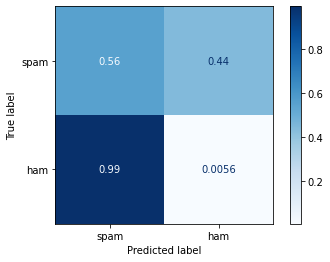

In [77]:
from sklearn import metrics
model = Bayes()
model.fit(X_train,y_train,class_priors=p_classes)
y_hat_train = model.predict(X_train)#,return_posteriors=True)
y_hat_test = model.predict(X_test)

print(metrics.classification_report(y_test,y_hat_test))
model.score(X_test,y_test)
metrics.plot_confusion_matrix(model,X_test,y_test,cmap="Blues",
                             normalize='true')


# Using Built-in Naive Bayes with `sklearn`


In [96]:
from nltk.corpus import stopwords
from string import punctuation
stopwords_list = stopwords.words('english')
stopwords_list += punctuation
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
 df2['label'].value_counts()

spam    747
ham     747
Name: label, dtype: int64

In [97]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words=stopwords_list)

In [98]:
X = df2['text']
y = df2['label'].copy()

X_train, X_test, y_train,y_test =train_test_split(X, y,random_state=17)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_train_vec

<1120x3702 sparse matrix of type '<class 'numpy.int64'>'
	with 13152 stored elements in Compressed Sparse Row format>

In [104]:
vectorizer.inverse_transform(X_test_vec[1])

[array(['order', 'ordered', 'ringtone'], dtype='<U27')]

              precision    recall  f1-score   support

         ham       0.97      0.95      0.96       194
        spam       0.95      0.97      0.96       180

    accuracy                           0.96       374
   macro avg       0.96      0.96      0.96       374
weighted avg       0.96      0.96      0.96       374



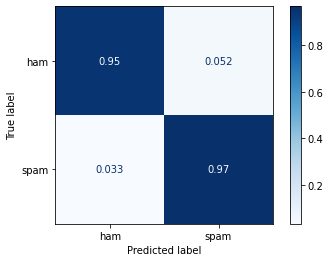

In [100]:
## Using  sklearn MultinomialNB https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_vec,y_train)

y_hat_test = model.predict(X_test_vec)

print(metrics.classification_report(y_test,y_hat_test))
metrics.plot_confusion_matrix(model,X_test_vec,y_test,cmap='Blues', normalize='true')
# y_test.value_counts(normalize=True)

In [101]:
model.classes_

array(['ham', 'spam'], dtype='<U4')

In [102]:
vocab = vectorizer.vocabulary_
len(vocab)

3702

In [103]:
model.n_features_

3702

## Summary

Well done! In this lab, you practiced implementing Naive Bayes for document classification!